# Diandra O'Connor Module 6 Project 2/15/23

## Exploratory Data Project, domain: gymnastics

### gymnastics_data_project.ipynb


## Use Pandas to load the csv dataset into a DataFrame

#### CSV file contains information from the Men's All Around Competition at the 2017 World Gymnastics Championships

In [24]:
import pandas as pd

Worlds2017 = pd.read_csv('World_Champs_Mens_All-Around.csv')

## View first 5 rows and last 5 rows using methods head() and tail()

#### Dataset contains 144 rows with information from 24 different gymnasts on 6 events

In [25]:
Worlds2017.head()

,Name,Overall Rank,Nationality,Apparatus,Diff,Exec,Total,Rank
0,Xiao Ruoteng,1,CHN,Floor,5.9,8.53,14.43,5
1,Xiao Ruoteng,1,CHN,Pommel Horse,6.1,8.70,14.80,2
2,Xiao Ruoteng,1,CHN,Rings,5.7,8.10,13.80,10
3,Xiao Ruoteng,1,CHN,Vault,5.6,9.30,14.90,3
4,Xiao Ruoteng,1,CHN,PBars,6.0,8.60,14.60,8


In [26]:
Worlds2017.tail()

,Name,Overall Rank,Nationality,Apparatus,Diff,Exec,Total,Rank
139,Joel Plata Rodriguez,24,SP,Pommel Horse,4.1,6.53,10.63,24
140,Joel Plata Rodriguez,24,SP,Rings,5.1,8.40,13.50,15
141,Joel Plata Rodriguez,24,SP,Vault,4.8,8.83,13.63,22
142,Joel Plata Rodriguez,24,SP,PBars,5.4,8.00,13.40,21
143,Joel Plata Rodriguez,24,SP,High Bar,5.5,6.37,11.87,23


## Rename columns for workability

In [27]:
Worlds2017.columns = ['name', 'overall rank', 'country', 'event', 'D_score', 'E_score', 'total', 'event rank']

## View first 5 rows of DataFrame to show changes to column names

In [28]:
Worlds2017.head()

,name,overall rank,country,event,D_score,E_score,total,event rank
0,Xiao Ruoteng,1,CHN,Floor,5.9,8.53,14.43,5
1,Xiao Ruoteng,1,CHN,Pommel Horse,6.1,8.70,14.80,2
2,Xiao Ruoteng,1,CHN,Rings,5.7,8.10,13.80,10
3,Xiao Ruoteng,1,CHN,Vault,5.6,9.30,14.90,3
4,Xiao Ruoteng,1,CHN,PBars,6.0,8.60,14.60,8


## Get unique values for the event column

#### You'll notice 6 unique values which are the 6 events the men compete on

In [29]:
events = Worlds2017["event"].unique()

events    # this shows us the terminology used for each event

array(['Floor', 'Pommel Horse', 'Rings', 'Vault', 'PBars', 'High Bar'],
      dtype=object)

## Creat a DataFrame for each event and find the average scores

### Floor

In [30]:
Worlds2017_Floor = pd.DataFrame(Worlds2017.loc[Worlds2017['event'] == 'Floor'])  

In [31]:
pd.set_option('display.precision', 2)  # round to 2 decimal places

Worlds2017_Floor[['total', 'D_score', 'E_score']].mean()  # D score = difficulty, E score = execution

total      13.81
D_score     5.71
E_score     8.11
dtype: float64

### Pommel Horse

In [32]:
Worlds2017_Pommel_Horse = pd.DataFrame(Worlds2017.loc[Worlds2017['event'] == 'Pommel Horse'])

In [33]:
pd.set_option('display.precision', 2)

Worlds2017_Pommel_Horse[['total', 'D_score', 'E_score']].mean()

total      13.21
D_score     5.48
E_score     7.73
dtype: float64

### Rings

In [34]:
Worlds2017_Rings = pd.DataFrame(Worlds2017.loc[Worlds2017['event'] == 'Rings'])

In [35]:
pd.set_option('display.precision', 2)

Worlds2017_Rings[['total', 'D_score', 'E_score']].mean()

total      13.59
D_score     5.35
E_score     8.24
dtype: float64

### Vault

In [36]:
Worlds2017_Vault = pd.DataFrame(Worlds2017.loc[Worlds2017['event'] == 'Vault'])

In [37]:
pd.set_option('display.precision', 2)

Worlds2017_Vault[['total', 'D_score', 'E_score']].mean()

total      14.29
D_score     5.23
E_score     9.06
dtype: float64

### Parallel Bars

In [38]:
Worlds2017_PBars = pd.DataFrame(Worlds2017.loc[Worlds2017['event'] == 'PBars'])

In [39]:
pd.set_option('display.precision', 2)

Worlds2017_PBars[['total', 'D_score', 'E_score']].mean()

total      14.19
D_score     5.90
E_score     8.29
dtype: float64

### High Bar

In [40]:
Worlds2017_HighBar = pd.DataFrame(Worlds2017.loc[Worlds2017['event'] == 'High Bar'])

In [41]:
Worlds2017_HighBar= pd.DataFrame(Worlds2017.loc[Worlds2017['event'] == 'High Bar'])

total      13.27
D_score     5.56
E_score     7.71
dtype: float64

## Bar Chart showing average total score, average E score and average D score across all events as calculated above

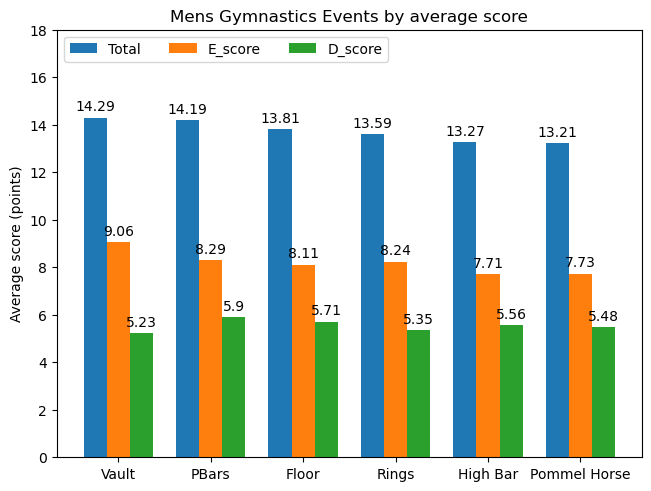

In [42]:
import matplotlib.pyplot as plt
import numpy as np

event = ("Vault", "PBars", "Floor", "Rings", "High Bar", "Pommel Horse")
event_means = {'Total': (14.29, 14.19, 13.81, 13.59, 13.27, 13.21), 'E_score': (9.06, 8.29, 8.11, 8.24, 7.71, 7.73),
'D_score': (5.23, 5.9, 5.71, 5.35, 5.56, 5.48) }

x = np.arange(len(event))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in event_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Average score (points)')
ax.set_title('Mens Gymnastics Events by average score')
ax.set_xticks(x + width, event)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 18)

plt.show()

### You can see from the chart above that Vault has the highest average total score despite having the lowest D score (difficulty score). This means that the E score (execution score) for Vault must be consistently higher than the other events.  Let's look at the data for E scores more closely.  

## Creat a list of E scores for each event

In [43]:
Vault_E_score = Worlds2017_Vault['E_score'].tolist()

PBars_E_score = Worlds2017_PBars['E_score'].tolist()

Floor_E_score = Worlds2017_Floor['E_score'].tolist()

Rings_E_score = Worlds2017_Rings['E_score'].tolist()

HighBar_E_score = Worlds2017_HighBar['E_score'].tolist()

Pommel_Horse_E_score = Worlds2017_Pommel_Horse['E_score'].tolist()



## Calculate mean, median and mode of E scores on each event: note the values for Vault compared to the other events

In [44]:
import statistics as stats

mean_Vault = stats.mean(Vault_E_score)
median_Vault = stats.median(Vault_E_score)
mode_Vault  = stats.mode(Vault_E_score)

mean_PBars = stats.mean(PBars_E_score)
median_PBars = stats.median(PBars_E_score)
mode_PBars  = stats.mode(PBars_E_score)

mean_Floor = stats.mean(Floor_E_score)
median_Floor = stats.median(Floor_E_score)
mode_Floor  = stats.mode(Floor_E_score)

mean_Rings = stats.mean(Rings_E_score)
median_Rings = stats.median(Rings_E_score)
mode_Rings  = stats.mode(Rings_E_score)

mean_HighBar = stats.mean(HighBar_E_score)
median_HighBar = stats.median(HighBar_E_score)
mode_HighBar  = stats.mode(HighBar_E_score)

mean_Pommel_Horse = stats.mean(Pommel_Horse_E_score)
median_Pommel_Horse = stats.median(Pommel_Horse_E_score)
mode_Pommel_Horse  = stats.mode(Pommel_Horse_E_score)


print()
print(f'The mean E score (execution score) for each event is:')
print(f"       ** Vault: {mean_Vault:.3f} **")
print(f"  Parallel Bars: {mean_PBars:.3f}")
print(f"          Floor: {mean_Floor:.3f}")
print(f"          Rings: {mean_Rings:.3f}")
print(f"       High Bar: {mean_HighBar:.3f}")
print(f"   Pommel Horse: {mean_Pommel_Horse:.3f}")
print()
print()
print(f'The median E score for each event is:')
print(f"       ** Vault: {median_Vault:.3f} **")
print(f"  Parallel Bars: {median_PBars:.3f}")
print(f"          Floor: {median_Floor:.3f}")
print(f"          Rings: {median_Rings:.3f}")
print(f"       High Bar: {median_HighBar:.3f}")
print(f"   Pommel Horse: {median_Pommel_Horse:.3f}")
print()
print()
print(f'The mode E score for each event is:')
print(f"       ** Vault: {mode_Vault:.3f} **")
print(f"  Parallel Bars: {mode_PBars:.3f}")
print(f"          Floor: {mode_Floor:.3f}")
print(f"          Rings: {mode_Rings:.3f}")
print(f"       High Bar: {mode_HighBar:.3f}")
print(f"   Pommel Horse: {mode_Pommel_Horse:.3f}")



The mean E score (execution score) for each event is:
       ** Vault: 9.062 **
  Parallel Bars: 8.291
          Floor: 8.106
          Rings: 8.244
       High Bar: 7.708
   Pommel Horse: 7.728


The median E score for each event is:
       ** Vault: 9.216 **
  Parallel Bars: 8.374
          Floor: 8.099
          Rings: 8.183
       High Bar: 7.966
   Pommel Horse: 7.883


The mode E score for each event is:
       ** Vault: 9.300 **
  Parallel Bars: 8.600
          Floor: 8.533
          Rings: 8.600
       High Bar: 8.233
   Pommel Horse: 8.133


## Calculate the standard deviation and variance of E scores on each event

In [45]:
def stdev_event(E_scorelist):
    """Returns standard deviation of E score list"""
    return stats.stdev(E_scorelist)


print()
print(f'The standard deviation of E scores for each event are:')
print(f'     ** Vault: {stdev_event(Vault_E_score):.3f} **')
print(f'Parallel Bars: {stdev_event(PBars_E_score):.3f}')
print(f'        Floor: {stdev_event(Floor_E_score):.3f}')
print(f'        Rings: {stdev_event(Rings_E_score):.3f}')
print(f'     High Bar: {stdev_event(HighBar_E_score):.3f}')
print(f' Pommel Horse: {stdev_event(Pommel_Horse_E_score):.3f}')
print()

def var_event(E_scorelist):
    """Returns variance of E score list"""
    return stats.variance(E_scorelist)

print()
print(f'The variance of E scores for each event are:')
print(f'     ** Vault: {var_event(Vault_E_score):.3f} **')
print(f'Parallel Bars: {var_event(PBars_E_score):.3f}')
print(f'        Floor: {var_event(Floor_E_score):.3f}')
print(f'        Rings: {var_event(Rings_E_score):.3f}')
print(f'     High Bar: {var_event(HighBar_E_score):.3f}')
print(f' Pommel Horse: {var_event(Pommel_Horse_E_score):.3f}')
print()    
print('The standard deviation and variance for Vault are 2nd to lowest of all the events')
print('Rings had the lowest variability of scores')




The standard deviation of E scores for each event are:
     ** Vault: 0.425 **
Parallel Bars: 0.521
        Floor: 0.492
        Rings: 0.414
     High Bar: 0.644
 Pommel Horse: 0.712


The variance of E scores for each event are:
     ** Vault: 0.181 **
Parallel Bars: 0.272
        Floor: 0.242
        Rings: 0.171
     High Bar: 0.415
 Pommel Horse: 0.507

The standard deviation and variance for Vault are 2nd to lowest of all the events
Rings had the lowest variability of scores


## Use list comprehensions to filter the data and get the number of E scores above 8.8 for each event

In [49]:


def event_above_8_8(E_score_list):                              # can use a function with list comprehansion
    """Returns a list of E scores above 8.8"""
    return [score for score in E_score_list if score > 8.8]


Vault_above_8_8 = event_above_8_8(Vault_E_score)

PBars_above_8_8 = [score for score in PBars_E_score if score > 8.8]     # can use list comprehension outside of a function

Floor_above_8_8 = [score for score in Floor_E_score if score > 8.8]

Rings_above_8_8 = [score for score in Rings_E_score if score > 8.8]

HighBar_above_8_8 = [score for score in HighBar_E_score if score > 8.8]

Pommel_Horse_above_8_8 = [score for score in Pommel_Horse_E_score if score > 8.8]

print()
print('The original dataset includes 24 scores for each event')
print('The following lists show the E scores in each event that are above 8.8:')
print()
print(f' Vault: {Vault_above_8_8}')                    
print(f' For vault, {len(Vault_above_8_8)} of 24 E scores were above 8.8')   
print()
print(f' Parallel Bars: {PBars_above_8_8}')
print(f' For Parallel Bars, {len(PBars_above_8_8)} of 24 E scores were above 8.8')
print()
print(f' Floor: {Floor_above_8_8}')
print(f' For Floor, {len(Floor_above_8_8)} of 24 E scores were above 8.8')
print()
print(f' Rings: {Rings_above_8_8}')
print(f' For Rings, {len(Rings_above_8_8)} of 24 E scores were above 8.8')
print()
print(f' High Bar: {HighBar_above_8_8}')
print(f' For High Bar, {len(HighBar_above_8_8)} of 24 E scores were above 8.8')
print()
print(f' Pommel Horse: {Pommel_Horse_above_8_8}')
print(f' For Pommel Horse, {len(Pommel_Horse_above_8_8)} of 24 E scores were above 8.8')
print()





The original dataset includes 24 scores for each event
The following lists show the E scores in each event that are above 8.8:

 Vault: [9.3, 9.3, 9.4, 9.183, 9.366, 8.9, 9.3, 9.233, 9.333, 9.2, 9.233, 9.3, 9.333, 9.3, 9.2, 9.1, 9.066, 9.3, 9.066, 8.933, 8.833]
 For vault, 21 of 24 E scores were above 8.8

 Parallel Bars: [8.866, 9.266]
 For Parallel Bars, 2 of 24 E scores were above 8.8

 Floor: []
 For Floor, 0 of 24 E scores were above 8.8

 Rings: [9.0, 8.933]
 For Rings, 2 of 24 E scores were above 8.8

 High Bar: []
 For High Bar, 0 of 24 E scores were above 8.8

 Pommel Horse: []
 For Pommel Horse, 0 of 24 E scores were above 8.8



### By comparing these lists you can clearly see that Vault E scores are higher than the other events.  
### Three events didn't have any E scores above 8.8 and two events only had 2 E scores above 8.8.
### Vault had 21 E scores above 8.8!
###  
###   

## Histograms for each event showing E score vs number of scores

(0.0, 22.0)

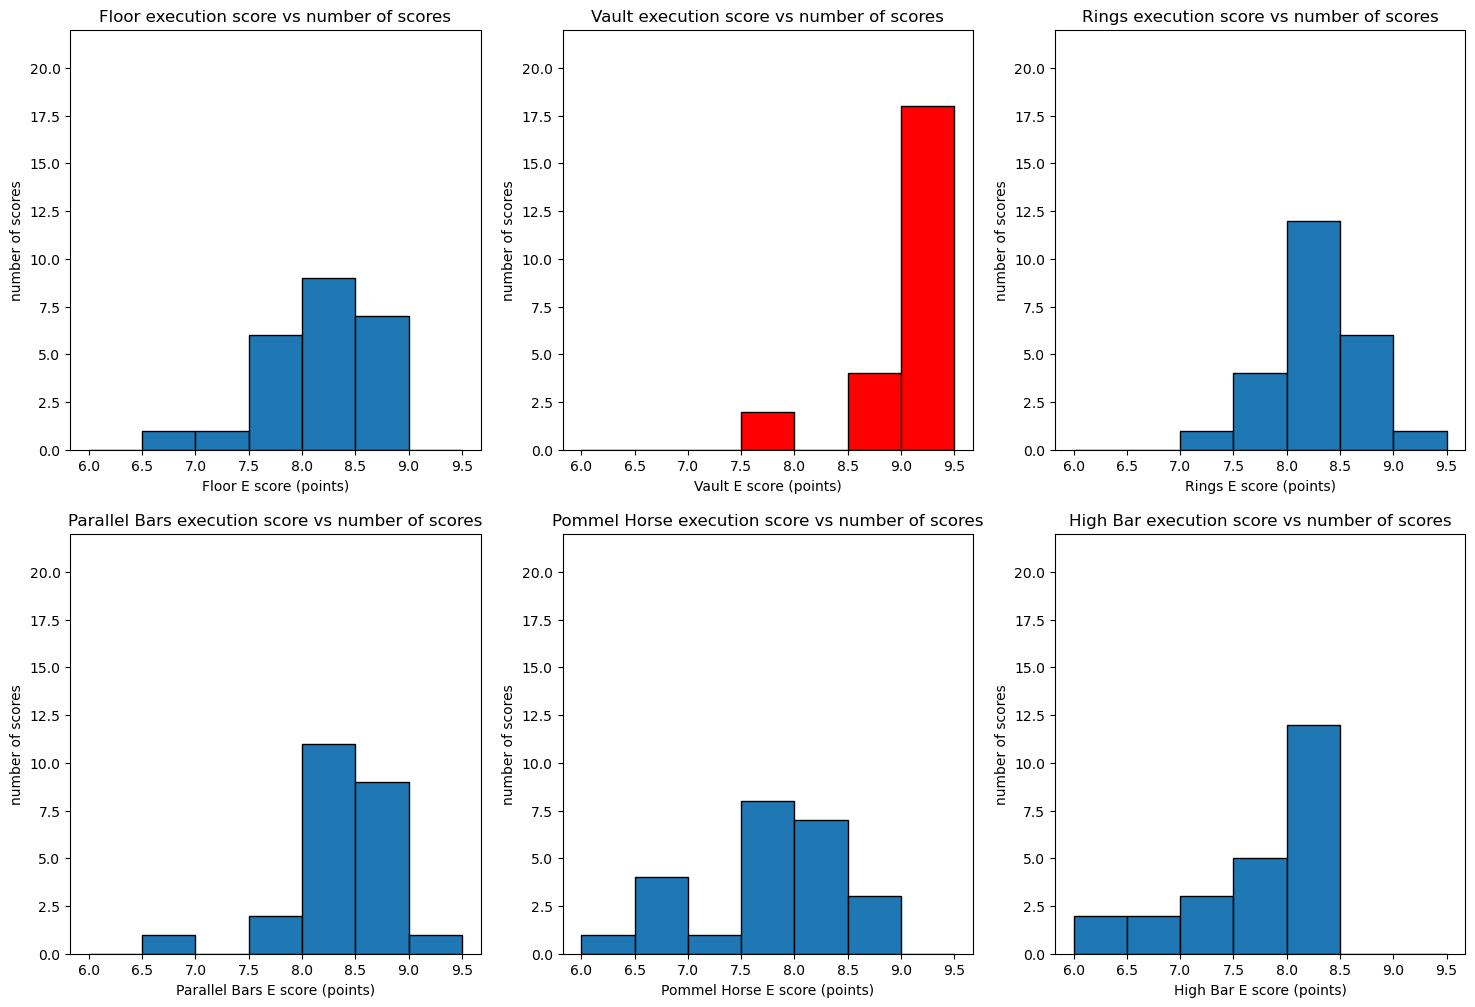

In [47]:
bins = [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5]
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
plt.hist(Floor_E_score, bins=bins, edgecolor='black')
plt.xlabel('Floor E score (points)')
plt.ylabel('number of scores')
plt.title('Floor execution score vs number of scores')
plt.ylim(0, 22)
plt.subplot(2,3,2)
plt.hist(Vault_E_score, bins=bins, edgecolor='black', color='red')
plt.xlabel('Vault E score (points)')
plt.ylabel('number of scores')
plt.title('Vault execution score vs number of scores')
plt.ylim(0, 22)
plt.subplot(2,3,3)
plt.hist(Rings_E_score, bins=bins, edgecolor='black')
plt.xlabel('Rings E score (points)')
plt.ylabel('number of scores')
plt.title('Rings execution score vs number of scores')
plt.ylim(0, 22)
plt.subplot(2,3,4)
plt.hist(PBars_E_score, bins=bins, edgecolor='black')
plt.xlabel('Parallel Bars E score (points)')
plt.ylabel('number of scores')
plt.title('Parallel Bars execution score vs number of scores')
plt.ylim(0, 22)
plt.subplot(2,3,6)
plt.hist(HighBar_E_score, bins=bins, edgecolor='black')
plt.xlabel('High Bar E score (points)')
plt.ylabel('number of scores')
plt.title('High Bar execution score vs number of scores')
plt.ylim(0, 22)
plt.subplot(2,3,5)
plt.hist(Pommel_Horse_E_score, bins=bins, edgecolor='black')
plt.xlabel('Pommel Horse E score (points)')
plt.ylabel('number of scores')
plt.title('Pommel Horse execution score vs number of scores')
plt.ylim(0, 22)




## Combined histogram showing E scores vs number of scores for all events

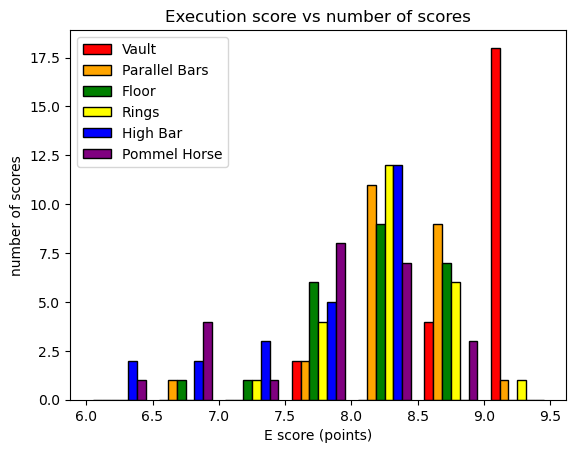

In [48]:
bins = [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5]

plt.hist([Vault_E_score, PBars_E_score, Floor_E_score, Rings_E_score, HighBar_E_score, Pommel_Horse_E_score], bins=bins, color =['red', 'orange', 'green', 'yellow', 'blue', 'purple'], edgecolor='black', label = ['Vault', 'Parallel Bars', 'Floor', 'Rings', 'High Bar', 'Pommel Horse'])
plt.xlabel('E score (points)')
plt.ylabel('number of scores')
plt.title('Execution score vs number of scores')
plt.legend(loc= 'upper left')

## You can see from the data analysis above that the Execution score (E score) for Vault was higher than any other event during the Men's All Around Competition at the 2017 World Gymnastics Championships

## Is the E score for Vault always higher?  Search the web to find another dataset and see what your results are!